# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv, find_dotenv
from pathlib import Path
from newsapi import NewsApiClient
import nltk as nltk
import json
from pandas.io.json import json_normalize
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\alexa\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv(Path("Resources/.env"))
api_key = os.getenv("NEWS_API_KEY")

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(q='bitcoin',
                                        language="en",
                                        page_size=100,
                                        sort_by="relevancy")
#save json
with open('Resources/btc.json', 'w') as json_file:
    json.dump(btc_headlines, json_file)

In [5]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(q='ethereum',
                                        language="en",
                                        page_size=100,
                                        sort_by="relevancy")
#save json
with open('Resources/eth.json', 'w') as json_file:
    json.dump(eth_headlines, json_file)

In [6]:
# Create the Bitcoin sentiment scores DataFrame
# read in the file
btc = pd.read_json('Resources/btc.json')
#parse the json and load into a dataframe
btc_df = json_normalize(btc['articles'])
#drop all columns except for description
btc_df = btc_df.drop(['author', 'title', 'url','urlToImage','publishedAt','content','source.id','source.name'], axis=1)
#instantiate vader sentiment 
sentiment_title = btc_df.apply(lambda x : analyzer.polarity_scores(x['description']), axis=1)
#add a column for each sentimement metric
btc_df['Comp'] =sentiment_title.apply(lambda x : x.get('compound') )
btc_df['Pos'] =sentiment_title.apply(lambda x : x.get('pos') )
btc_df['Neu'] =sentiment_title.apply(lambda x : x.get('neu') )
btc_df['Neg'] =sentiment_title.apply(lambda x : x.get('neg') )
btc_df

<ipython-input-6-18cc54aeca79>:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  btc_df = json_normalize(btc['articles'])


,description,Comp,Pos,Neu,Neg
0,Autonomous vehicles use the equivalent of 200 ...,0.0772,0.053,0.947,0.000
1,Three days after ransomware attackers hijacked...,-0.7845,0.000,0.823,0.177
2,"The authors of a ""colossal"" ransomware attack ...",-0.5574,0.000,0.787,0.213
3,While retail investors grew more comfortable b...,0.7264,0.135,0.865,0.000
4,"As longtime TechCrunch readers know well, Mich...",0.2732,0.079,0.921,0.000
...,...,...,...,...,...
95,Trading volumes at major cryptocurrency exchan...,-0.5859,0.000,0.854,0.146
96,Dallas Mavericks owner Mark Cuban said bitcoin...,-0.4019,0.053,0.782,0.165
97,The billionaire said that Banco Azteca is gett...,0.8020,0.215,0.785,0.000
98,This is the longest series of consecutive outf...,0.0000,0.000,1.000,0.000


In [7]:
# Create the Ethereum sentiment scores DataFrame
#read in the json file
eth = pd.read_json ('Resources/eth.json')
eth_df = json_normalize(eth['articles'])
#parse the json and load into a dataframe
eth_df = json_normalize(eth['articles'])
#drop all columns except for description
eth_df = eth_df.drop(['author', 'title', 'url','urlToImage','publishedAt','content','source.id','source.name'], axis=1)
#instantiate vader sentiment 
sentiment_title = eth_df.apply(lambda x : analyzer.polarity_scores(x['description']), axis=1)
#add a column for each sentimement metric
eth_df['Comp'] =sentiment_title.apply(lambda x : x.get('compound') )
eth_df['Pos'] =sentiment_title.apply(lambda x : x.get('pos') )
eth_df['Neu'] =sentiment_title.apply(lambda x : x.get('neu') )
eth_df['Neg'] =sentiment_title.apply(lambda x : x.get('neg') )
eth_df

<ipython-input-7-aed53b7d3b1b>:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  eth_df = json_normalize(eth['articles'])
<ipython-input-7-aed53b7d3b1b>:6: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  eth_df = json_normalize(eth['articles'])


,description,Comp,Pos,Neu,Neg
0,There are many blockchain platforms competing ...,0.3612,0.059,0.941,0.000
1,While retail investors grew more comfortable b...,0.7264,0.135,0.865,0.000
2,Ethereum overtook bitcoin in the number of act...,0.3612,0.186,0.744,0.070
3,"""Anthony Di Iorio, a co-founder of the Ethereu...",0.7650,0.178,0.822,0.000
4,"Users are putting forward ""stakes"" of ether to...",0.7096,0.219,0.781,0.000
...,...,...,...,...,...
95,Authorities raided a cryptocurrency mine that ...,-0.5719,0.000,0.829,0.171
96,The art world’s erstwhile enfant terrible appr...,-0.4767,0.000,0.925,0.075
97,Bitcoin and other cryptocurrencies rose on Wed...,0.3818,0.062,0.938,0.000
98,Think meme stock investing is a fad? Think aga...,0.2263,0.101,0.899,0.000


In [8]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,Comp,Pos,Neu,Neg
count,100.000000,100.000000,100.00000,100.000000
mean,0.041762,0.073560,0.86383,0.062640
std,0.426112,0.082015,0.09878,0.080263
min,-0.865800,0.000000,0.61900,0.000000
25%,-0.296000,0.000000,0.81450,0.000000
50%,0.000000,0.064500,0.86050,0.000000
75%,0.361200,0.112000,0.93275,0.111000
max,0.827100,0.352000,1.00000,0.381000


In [9]:
# Describe the Ethereum Sentiment
eth_df.describe()

,Comp,Pos,Neu,Neg
count,100.000000,100.000000,100.000000,100.000000
mean,0.144211,0.071650,0.883880,0.044500
std,0.349044,0.079003,0.104634,0.075207
min,-0.812600,0.000000,0.542000,0.000000
25%,0.000000,0.000000,0.822000,0.000000
50%,0.038700,0.061500,0.897000,0.000000
75%,0.421500,0.118000,1.000000,0.066250
max,0.860800,0.317000,1.000000,0.444000


### Questions:

Q: Which coin had the highest mean positive score?

A: BTC = 0.074

Q: Which coin had the highest compound score?

A: ETH = 0.861

Q. Which coin had the highest positive score?

A: BTC = 0.352

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
import string

In [11]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
stop_words = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_addon = {'said', 'know', 'well', 'think'}

In [12]:
# Complete the tokenizer function
def tokenizer(text):
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    # Create a list of the words
    tokens = word_tokenize(re_clean)
    # Convert the words to lowercase
    tokens = [t.lower() for t in tokens]
    # Remove the punctuation
    words = [t.translate(str.maketrans('','',string.punctuation)) for t in tokens]
    # Remove the stop words
    words = [w for w in words if not w in stop_words]
    words = [w for w in words if not w in stop_words.union(sw_addon)]
    # Lemmatize Words into root words
    tokens = ', '.join([lemmatizer.lemmatize(word) for word in words])
    return tokens

In [13]:
# Create a new tokens column for Bitcoin
btc_df['tokens'] = btc_df.apply(lambda x : tokenizer(x['description']), axis=1)
btc_df

,description,Comp,Pos,Neu,Neg,tokens
0,Autonomous vehicles use the equivalent of 200 ...,0.0772,0.053,0.947,0.000,"autonomous, vehicle, use, equivalent, laptop, ..."
1,Three days after ransomware attackers hijacked...,-0.7845,0.000,0.823,0.177,"three, day, ransomware, attacker, hijacked, ma..."
2,"The authors of a ""colossal"" ransomware attack ...",-0.5574,0.000,0.787,0.213,"author, colossal, ransomware, attack, demand, ..."
3,While retail investors grew more comfortable b...,0.7264,0.135,0.865,0.000,"retail, investor, grew, comfortable, buying, c..."
4,"As longtime TechCrunch readers know well, Mich...",0.2732,0.079,0.921,0.000,"longtime, techcrunch, reader, michael, arringt..."
...,...,...,...,...,...,...
95,Trading volumes at major cryptocurrency exchan...,-0.5859,0.000,0.854,0.146,"trading, volume, major, cryptocurrency, exchan..."
96,Dallas Mavericks owner Mark Cuban said bitcoin...,-0.4019,0.053,0.782,0.165,"dallas, maverick, owner, mark, cuban, bitcoins..."
97,The billionaire said that Banco Azteca is gett...,0.8020,0.215,0.785,0.000,"billionaire, banco, azteca, getting, ready, fi..."
98,This is the longest series of consecutive outf...,0.0000,0.000,1.000,0.000,"longest, series, consecutive, outflow, since, ..."


In [14]:
# Create a new tokens column for Ethereum
eth_df['tokens'] = eth_df.apply(lambda x : tokenizer(x['description']), axis=1)
eth_df

,description,Comp,Pos,Neu,Neg,tokens
0,There are many blockchain platforms competing ...,0.3612,0.059,0.941,0.000,"many, blockchain, platform, competing, investo..."
1,While retail investors grew more comfortable b...,0.7264,0.135,0.865,0.000,"retail, investor, grew, comfortable, buying, c..."
2,Ethereum overtook bitcoin in the number of act...,0.3612,0.186,0.744,0.070,"ethereum, overtook, bitcoin, number, active, a..."
3,"""Anthony Di Iorio, a co-founder of the Ethereu...",0.7650,0.178,0.822,0.000,"anthony, di, iorio, cofounder, ethereum, netwo..."
4,"Users are putting forward ""stakes"" of ether to...",0.7096,0.219,0.781,0.000,"user, putting, forward, stake, ether, gain, ri..."
...,...,...,...,...,...,...
95,Authorities raided a cryptocurrency mine that ...,-0.5719,0.000,0.829,0.171,"authority, raided, cryptocurrency, mine, alleg..."
96,The art world’s erstwhile enfant terrible appr...,-0.4767,0.000,0.925,0.075,"art, world, erstwhile, enfant, terrible, appro..."
97,Bitcoin and other cryptocurrencies rose on Wed...,0.3818,0.062,0.938,0.000,"bitcoin, cryptocurrencies, rose, wednesday, el..."
98,Think meme stock investing is a fad? Think aga...,0.2263,0.101,0.899,0.000,"meme, stock, investing, fad, least, according,..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
def process_text(text):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return output

def bigram_counter(corpus): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(corpus)
    processed = process_text(big_string)
    bigrams = ngrams(processed, n=2)
    top_10 = dict(Counter(bigrams).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['bigram', 'count'])

In [17]:
# Generate the Bitcoin N-grams where N=2
corpus = btc_df["description"]
bigram_counter(corpus)

,bigram,count
0,"(legal, tender)",8
1,"(like, bitcoin)",7
2,"(central, bank)",7
3,"(bitcoin, legal)",6
4,"(el, salvador)",5
5,"(previous, close)",5
6,"(financial, market)",5
7,"(jack, dorsey)",5
8,"(chinas, central)",5
9,"(digital, asset)",5


In [18]:
# Generate the Ethereum N-grams where N=2
corpus = eth_df["description"]
bigram_counter(corpus)

,bigram,count
0,"(nonfungible, token)",8
1,"(digital, asset)",6
2,"(previous, close)",5
3,"(federal, reserve)",5
4,"(investment, product)",5
5,"(product, fund)",5
6,"(according, data)",5
7,"(asset, manager)",5
8,"(manager, coinshares)",5
9,"(bitcoin, ethereum)",4


In [19]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [20]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    # Combine all articles in corpus into one large string
    big_string = ' '.join(tokens)
    processed = process_text(big_string)
    top = dict(Counter(processed).most_common(10))
    return pd.DataFrame(list(top.items()), columns=['word', 'count'])

In [21]:
# Use token_count to get the top 10 words for Bitcoin
tokens = btc_df["description"]
token_count(tokens, N=10)

,word,count
0,bitcoin,83
1,said,27
2,cryptocurrency,22
3,fund,18
4,bank,17
5,ha,14
6,cryptocurrencies,12
7,company,12
8,crypto,12
9,thursday,11


In [22]:
# Use token_count to get the top 10 words for Ethereum
tokens = eth_df["description"]
token_count(tokens, N=10)

,word,count
0,bitcoin,28
1,cryptocurrency,25
2,ethereum,17
3,ha,15
4,million,15
5,said,15
6,crypto,14
7,asset,12
8,investor,11
9,cryptocurrencies,11


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('seaborn-whitegrid')
matplotlib.rcParams['figure.figsize'] = [20.0, 10.0]

In [24]:
def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return ' '.join(output)

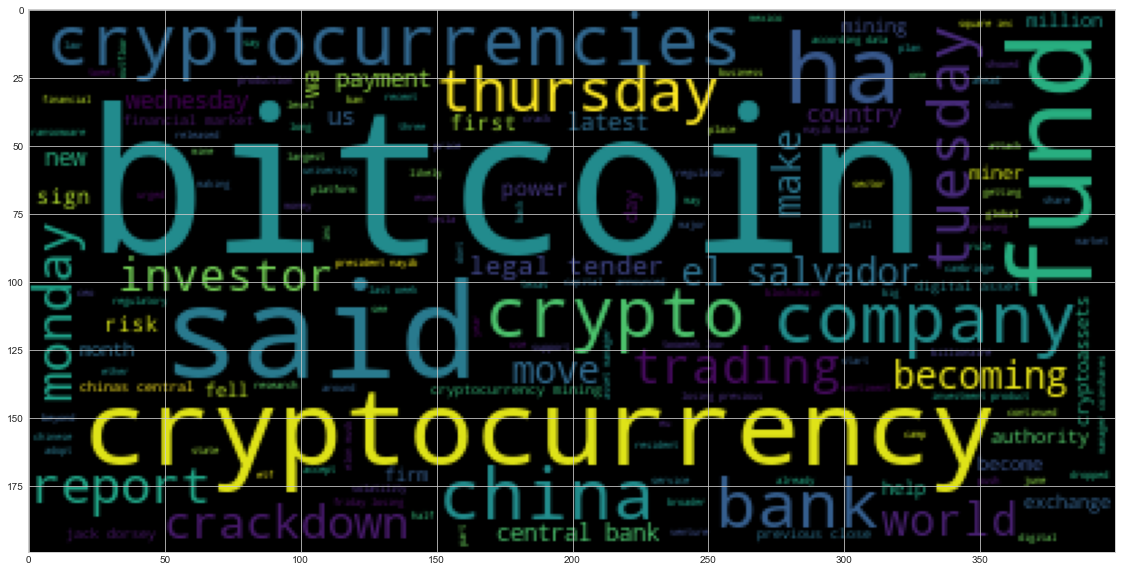

In [25]:
# Generate the Bitcoin word cloud
btc_corpus = btc_df["description"]


big_string = ' '.join(btc_corpus)
input_text = process_text(big_string)

wc = WordCloud().generate(input_text)
plt.imshow(wc)

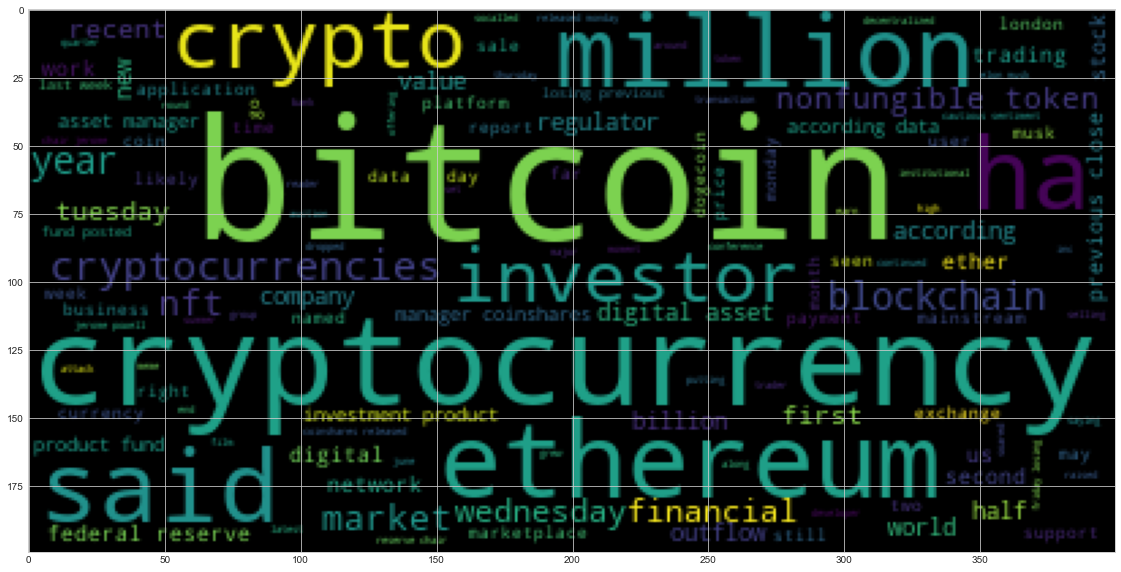

In [26]:
# Generate the Ethereum word cloud
eth_corpus = eth_df["description"]

big_string = ' '.join(eth_corpus)
input_text = process_text(big_string)

wc = WordCloud().generate(input_text)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [27]:
import spacy
from spacy import displacy

In [28]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [29]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [30]:
# Concatenate all of the Bitcoin text together
concat_btc = btc_df['description'].str.cat(sep=', ')

In [31]:
# Run the NER processor on all of the text
btc = nlp(concat_btc)
# Add a title to the document
btc.user_data["title"] = "BTC NER WORD CLOUD"

In [32]:
# Render the visualization
displacy.render(btc, style='ent')

In [33]:
# List all Entities
print([ent.text for ent in btc.ents])

['200', 'Three days', 'REvil', 'as much as $70 million', 'Bitcoin and Ethereum', '2021', 'Phantom', 'Michael Arrington', 'TechCrunch', 'Crunchbase', 'CrunchFund', 'Tuesday', '2017', 'Arrington', 'El Salvador', 'Nayib Bukele', 'El Salvador', 'Nayib Bukele', '2021', '7.37%', '32,094.44', 'Friday', '2,554.88', '5.44%', '36,361.69', 'Tuesday', '1,874.58', 'Bitcoin', '7.37%', '32,094.44', 'Friday', '2,554.88', '5.17%', '33,226.36', 'Thursday', '1,810.87', '8.51%', '31,699.83', '22:04 GMT', 'Friday', '2,937.27', 'one-month', 'above $30,000', 'Wednesday', 'one-month', 'above $30,000', 'Wednesday', 'U.S.', 'the Wild West', 'Wyoming', 'the Federal Reserve', 'D.C.', 'The Bitcoin Fund', 'Nasdaq Dubai', 'Wednesday', "the Middle East's", 'first', 'The Bitcoin Fund', 'Nasdaq Dubai', 'Wednesday', "the Middle East's", 'first', 'One', 'California', 'Stick', 'Tesla Inc <', 'TSLA.O', 'Elon Musk', 'Wednesday', 'REvil', 'hundreds', "El Salvador's", 'Fitch', 'Friday', 'Ransomware', '2020', 'this year', 'the

---

### Ethereum NER

In [34]:
# Concatenate all of the Ethereum text together
concat_eth = eth_df['description'].str.cat(sep=', ')

In [35]:
# Run the NER processor on all of the text
eth = nlp(concat_eth)
# Add a title to the document
eth.user_data["title"] = "ETH NER WORD CLOUD"

In [36]:
# Render the visualization
displacy.render(eth, style='ent')

In [37]:
print([ent.text for ent in eth.ents])

['Ethereum', 'Ethereum Killers', 'Solana', 'Bitcoin and Ethereum', '2021', 'Phantom', 'Ethereum', 'Friday', 'Anthony Di Iorio', 'Ethereum', 'Bloomberg', 'Slashdot', '48', '2.0', '2.0', 'Coinbase', 'around $500 million', 'the end of 2025', 'JPMorgan', 'NFT', '90 percent', 'recent weeks', 'recent months', 'BlockFi', 'QETH11', 'São Paulo', '7.37%', '32,094.44', 'Friday', '2,554.88', 'February 2018', 'last week', 'three years ago', 'last week', '$79 million', 'London', 'Ethereum', '12 965 000', 'August 3-5, 2021', 'London', '5.44%', '36,361.69', 'Tuesday', '1,874.58', '8.51%', '31,699.83', '22:04 GMT', 'Friday', '2,937.27', 'Hackaday', 'Proof of Work', 'Bitcoin, Ethereum', '5.17%', '33,226.36', 'Thursday', '1,810.87', '7.37%', '32,094.44', 'Friday', '2,554.88', 'Polygon', '$100 million', 'Federal Reserve Chair', 'Jerome Powell', 'Wednesday', 'U.S.', 'Tesla Inc <', 'TSLA.O', 'Elon Musk', 'Wednesday', 'the second half of the year', 'summer', 'CoinShares', 'Monday', 'the last week of June', '

---